# Building a Machine Learning Model in 3 lines of Code

Machine Learning as a subject is not easy.It is indeed a set of tools (mainly algorithms and optimization procedures) whose 
comprehension involves, a deep understanding of maths and stats.

Neverthless, the implementation of an ML Model in real scenario might be easier than expected.Indeed, once you got familiar
with theriotical concepts, you will be able to use pre-built packages and utilities available in Python.In otherwords, to 
build a basic model, you don`t have to be ninja in Python: the most important thing is to understanding the underlying 
problem and develop a theory to solve it.Then Python will do the hard job for you.

In this, I`m going to show you how to build an ML pipeline step by step, and then I`ll show you how to 'envelope' all the
steps in 3 lines of codes.

For this purpose, I`m going to use the Red Wine Quality Dataset, avaiable on Kaggle.

Data Set Link:https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# So, Let`s visualize it

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Input variables (based on physiochemical tests) s.no 1-11 and output variable is 12th one i.e quality (score b/w 0 to 10)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

We are dealing with a supervised, classification task, since the target variable is ordinal and not continuous. 
Here, I’m going to use as classification algorithm the Support Vector Machine (SVM)

# Data Pre-Processing

From our dataset, we can see that there are 11 features and 1 label. 
There are two things that come to mind looking at it:
The eleven features take values on different scales: namely,
total sulfur dioxide exhibits 2-digits integers, 
while chlorides take values less than 1. We can easily visualize this evidence with a boxplot:



[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol'),
 Text(11, 0, 'quality')]

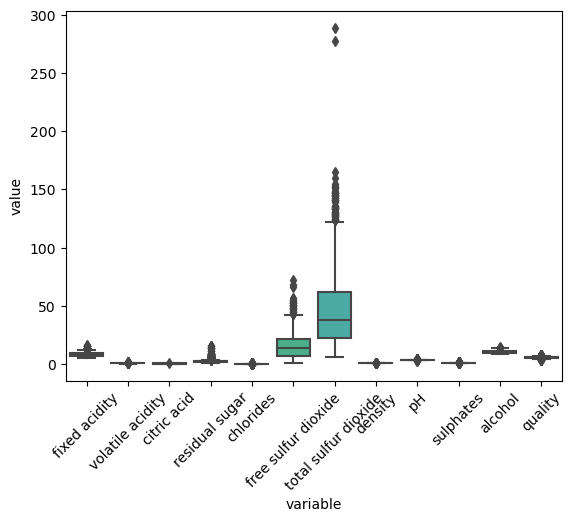

In [7]:
import seaborn as sns
data_m=pd.melt(df)
fig=sns.boxplot(x='variable', y='value', data=data_m)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

This tends to deviate the SVM coefficients from those which describe the most efficient hyperplane.
Hence we might want to scale our variable.

In [18]:
#let`s seperate features from labels:
from sklearn.model_selection import train_test_split
X=df.drop('quality',axis=1)
y=df['quality']

#let`s create a train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

# let`s scale our variables
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.400000
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.800000
...,...,...,...,...,...,...,...,...,...,...,...
1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.300000
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.400000
1406,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.900000
1389,6.7,0.480,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,9.700000


In [14]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
912,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4
1037,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3
...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0
580,12.3,0.50,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6
1082,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5
1279,9.8,0.30,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5


The second thing to note is the elevate number of explanatory variables, eleven. 
Because the final goal of ML models is to well predict on new, unseen data, the risk of overfitting
a model with too many parameters is high. Hence, we might want to drop some of our features, yet without
losing relevant information. A very powerful technique for dimensionality reduction is the 
Principal Component Analysis (PCA), and it is what we are going to apply here:


In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #reducing dimensionality from 11 to 2
principleComponents=pca.fit_transform(X_train_scaled)

In [20]:
X_train_scaled

array([[ 3.21585199, -0.62009277,  1.82215307, ..., -1.94482609,
         0.87527692,  0.38425831],
       [-0.66071613,  0.478955  , -0.99356478, ..., -0.36477256,
        -0.87360982, -0.94256352],
       [-0.54669942,  1.44062181, -0.43042121, ..., -0.95729263,
        -0.8153136 , -0.78460854],
       ...,
       [-0.09063259, -1.55428339,  0.33750184, ..., -0.56227925,
         1.63312784,  0.47903129],
       [-0.94575791, -0.23542605, -1.300734  , ..., -1.35230601,
        -0.75701738, -0.65824456],
       [-1.00276626,  0.20419306, -0.68639556, ...,  0.75443202,
        -0.23235135,  1.2372152 ]])

# Nice, We are now ready to deploy our model

In [25]:
from sklearn import svm
clf=svm.SVC()
clf.fit(principleComponents,y_train)
clf.score(principleComponents,y_train)

0.5379803395889187

The final output is the accuracy of our model, that means, the percentage of correctly classified input within the train set.

The very last thing to implement referes to the splitting criteria we have been setting. Indeed, we don`t know how our SVM
model is performing, had it been trained on a different train set.How can we reach a score which is representative of more
than one possible splitting criterion? Well, it might be reached through the technique of Cross-Validation: it consists of 
splitting the train set into K-folds, then the model is trained on k1-folds and tested on the remaining one.The final score
will be the average of all the scores reached in each of the K iterations. In that way, 'unlucky' train sets will be
compensated by 'lucky' ones.

# Let’s see how to implement it during the training phase:



In [26]:
from sklearn.model_selection import cross_val_score
score_scaled=cross_val_score(svm.SVC(), X_train_scaled, y_train,cv=5)
np.mean(score_scaled)

0.6184016655989749

As you can see, now the accuracy is greater.



# Building a pipeline

Scikit-learn amongst it`s useful packages, offers the possibility to envelope all the steps we have been talking about
in a pipeline , which can be easily imported as follows


In [28]:
from sklearn.pipeline import make_pipeline 
pipe=make_pipeline(StandardScaler(), PCA(n_components=2),svm.SVC())
score_pipe=cross_val_score(pipe,X_train,y_train,cv=5)

And that` it. Basically, we put all our transformations into the pipeline, that`s the reason why,while cross-validating
we put X_train rathan than X_train_scaled: since we are using our 'pipe' as first argument, all the transformations are
automatic.

Using Scikit-learn Pipeline is a smart shortcut which can save a lot of your time. Neverthless, you have to have clear in mind
which steps you want to implement, so that you can replicate it in your pipe.
